In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models

import imageio
import time
import random
import copy
import sys
import json
from PIL import Image

#### task 1:read txt path and label

In [2]:
def load_annotations(ann_path):
    data_infos = {} 
    with open(ann_path, 'r') as f:
        samples = [x.strip().split(' ') for x in f.readlines()]
        for filename, gt_label in samples:
            data_infos[filename] = np.array(gt_label, dtype=np.int64)

    return data_infos

In [3]:
print(load_annotations('./flower_data/train.txt'))

{'image_06734.jpg': array(0), 'image_06735.jpg': array(0), 'image_06736.jpg': array(0), 'image_06737.jpg': array(0), 'image_06738.jpg': array(0), 'image_06740.jpg': array(0), 'image_06741.jpg': array(0), 'image_06742.jpg': array(0), 'image_06744.jpg': array(0), 'image_06745.jpg': array(0), 'image_06746.jpg': array(0), 'image_06747.jpg': array(0), 'image_06748.jpg': array(0), 'image_06750.jpg': array(0), 'image_06751.jpg': array(0), 'image_06753.jpg': array(0), 'image_06757.jpg': array(0), 'image_06759.jpg': array(0), 'image_06761.jpg': array(0), 'image_06762.jpg': array(0), 'image_06766.jpg': array(0), 'image_06767.jpg': array(0), 'image_06768.jpg': array(0), 'image_06770.jpg': array(0), 'image_06771.jpg': array(0), 'image_06772.jpg': array(0), 'image_06773.jpg': array(0), 'image_07086.jpg': array(9), 'image_07087.jpg': array(9), 'image_07088.jpg': array(9), 'image_07089.jpg': array(9), 'image_07091.jpg': array(9), 'image_07092.jpg': array(9), 'image_07093.jpg': array(9), 'image_07095.

#### Task2: save data and labels in lists

In [4]:
image_labels = load_annotations('./flower_data/train.txt')
image_names = list(image_labels.keys())
labels = list(image_labels.values())

In [6]:
image_names

['image_06734.jpg',
 'image_06735.jpg',
 'image_06736.jpg',
 'image_06737.jpg',
 'image_06738.jpg',
 'image_06740.jpg',
 'image_06741.jpg',
 'image_06742.jpg',
 'image_06744.jpg',
 'image_06745.jpg',
 'image_06746.jpg',
 'image_06747.jpg',
 'image_06748.jpg',
 'image_06750.jpg',
 'image_06751.jpg',
 'image_06753.jpg',
 'image_06757.jpg',
 'image_06759.jpg',
 'image_06761.jpg',
 'image_06762.jpg',
 'image_06766.jpg',
 'image_06767.jpg',
 'image_06768.jpg',
 'image_06770.jpg',
 'image_06771.jpg',
 'image_06772.jpg',
 'image_06773.jpg',
 'image_07086.jpg',
 'image_07087.jpg',
 'image_07088.jpg',
 'image_07089.jpg',
 'image_07091.jpg',
 'image_07092.jpg',
 'image_07093.jpg',
 'image_07095.jpg',
 'image_07096.jpg',
 'image_07097.jpg',
 'image_07098.jpg',
 'image_07099.jpg',
 'image_07100.jpg',
 'image_07103.jpg',
 'image_07105.jpg',
 'image_07106.jpg',
 'image_07108.jpg',
 'image_07109.jpg',
 'image_07110.jpg',
 'image_07111.jpg',
 'image_07112.jpg',
 'image_07113.jpg',
 'image_07114.jpg',


In [7]:
labels

[array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99

### 3. integrate images paths

In [14]:
data_dir = './flower_data'
train_dir = data_dir + '/train_filelist'
val_dir = data_dir + '/val_filelist'

In [15]:
image_path = [os.path.join(train_dir, img) for img in image_names]
image_path

['./flower_data/train_filelist/image_06734.jpg',
 './flower_data/train_filelist/image_06735.jpg',
 './flower_data/train_filelist/image_06736.jpg',
 './flower_data/train_filelist/image_06737.jpg',
 './flower_data/train_filelist/image_06738.jpg',
 './flower_data/train_filelist/image_06740.jpg',
 './flower_data/train_filelist/image_06741.jpg',
 './flower_data/train_filelist/image_06742.jpg',
 './flower_data/train_filelist/image_06744.jpg',
 './flower_data/train_filelist/image_06745.jpg',
 './flower_data/train_filelist/image_06746.jpg',
 './flower_data/train_filelist/image_06747.jpg',
 './flower_data/train_filelist/image_06748.jpg',
 './flower_data/train_filelist/image_06750.jpg',
 './flower_data/train_filelist/image_06751.jpg',
 './flower_data/train_filelist/image_06753.jpg',
 './flower_data/train_filelist/image_06757.jpg',
 './flower_data/train_filelist/image_06759.jpg',
 './flower_data/train_filelist/image_06761.jpg',
 './flower_data/train_filelist/image_06762.jpg',
 './flower_data/trai

#### put all together

In [17]:
from torch.utils.data import Dataset, DataLoader

class FlowerDataset(Dataset):
    def __init__(self, root_dir, ann_file, transform=None):
        # store the annotation file path and root directory
        self.ann_file = ann_file
        self.root_dir = root_dir

        # operate the annotation file to get image names and labels
        self.img_label = self.load_annotations()

        # integrate image paths and labels by list
        self.image_paths = [os.path.join(self.root_dir, img) for img in self.img_label.keys()]
        self.label = [label for label in self.img_label.values()]
        self.transform = transform


    def load_annotations(self):
        data_infos = {} 
        with open(self.ann_file, 'r') as f:
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                data_infos[filename] = np.array(gt_label, dtype=np.int64)

        return data_infos
    
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        label = self.label[idx]
        
        if self.transform:
            image = self.transform(image)
        label = torch.from_numpy(np.array(label))        
        return image, label

### Initialize dataLoader based on the custom dataset

In [25]:
data_transforms = {
    'train': 
    transforms.Compose([
        # Resize images to same pixels
        transforms.Resize((96, 96)),
        # Data augmentation
        transforms.RandomRotation(45), # rotate the image randomly within 45 degrees
        transforms.CenterCrop(64),     # crop the center 64x64 pixels
        transforms.RandomHorizontalFlip(p=0.5),  # randomly flip the image horizontally
        transforms.RandomVerticalFlip(p=0.5),    # randomly flip the image vertically
        #transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1), # randomly change brightness, contrast, saturation and hue
        transforms.RandomGrayscale(p=0.025), # randomly convert image to grayscale
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # RGB mean and std for normalization
    ]),
    'valid': 
    transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]),
}

In [26]:
train_dataset = FlowerDataset(root_dir=train_dir, 
                              ann_file='./flower_data/train.txt',
                              transform=data_transforms['train'])
val_dataset = FlowerDataset(root_dir=val_dir, 
                            ann_file='./flower_data/val.txt',
                            transform=data_transforms['valid'])

In [27]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [28]:
len(train_dataset), len(val_dataset)

(6552, 818)

### check the dataloader by iterating through a few batches

In [32]:
image, label = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4305114e-08..1.0].


Text(0.5, 1.0, 'Label: 80')

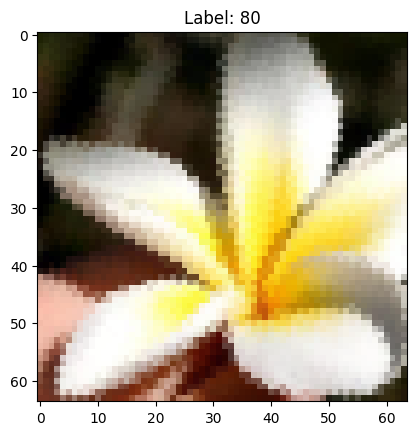

In [33]:
sample = image[0].squeeze()
sample = sample.permute(1, 2, 0).numpy()  # change from (C, H, W) to (H, W, C)
sample*= np.array([0.229, 0.224, 0.225])
sample+= np.array([0.485, 0.456, 0.406])
plt.imshow(sample)
plt.title(f'Label: {label[0].item()}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4305114e-08..0.98431367].


Text(0.5, 1.0, 'Label: 0')

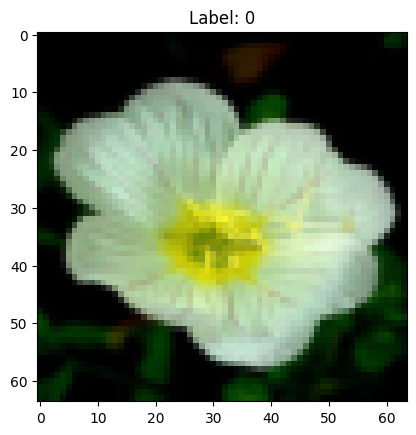

In [34]:
image, label = next(iter(val_loader))

sample = image[0].squeeze()
sample = sample.permute(1, 2, 0).numpy()  # change from (C, H, W) to (H, W, C)
sample*= np.array([0.229, 0.224, 0.225])
sample+= np.array([0.485, 0.456, 0.406])
plt.imshow(sample)
plt.title(f'Label: {label[0].item()}')
